# Single Layer Network Example

注意：このノートブックはGPUの有無に関わらずPython 3.x および　TensorFlow 2.xにて1.x環境を実行可能にする設定（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
2020/02/04: By H.Nishiyama<br>
2021/11/08 追加・変更部分のみ日本語化<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、次のセルを指示通りに修正して下さい。<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook

In [1]:
#オンラインのCloabシステムを使う場合、下記の行頭の「###」を削除する。
###%tensorflow_version 2.x

####[SNE-01]
Import modules and set random seeds.

In [2]:
import numpy as np
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models

np.random.seed(20160614)

#--- TensorFlow 1.x, を使う場合、下記のコメントアウト（###）を削除してください。
###tf.random.set_random_seed(20190825)
#--- For TensorFlow 2.x,用のコード。ensorFlow 1.x, を使う場合、下記をコメントアウトしてください。
tf.random.set_seed(20190825)

####[SNE-02]
Generate a training dateset.

In [3]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1', 'x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [-8, -8], 22, 0)
df1 = generate_datablock(15, [ 7, -8], 22, 0)
df2 = generate_datablock(10, [-8,  7], 22, 0)
df3 = generate_datablock(25, [ 5,  5], 22, 1)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

####[SNE-03]
Store the coordinates $(x_1,x_2)$ and label values $t$ into NumPy arrays.

In [4]:
train_x = train_set[['x1', 'x2']].values
train_t = train_set['t'].values

####[SNE-04]
Define a model for the binary classification using a single hidden layer.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [5]:
model = models.Sequential()
model.add(layers.Dense(4, activation='tanh', input_shape=(2,),
                       name='hidden'))
model.add(layers.Dense(1, activation='sigmoid',
                       name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


####[SNE-05]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

####[SNE-06]
Train the model.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [7]:
history = model.fit(train_x, train_t,
                    batch_size=len(train_set), epochs=5000, verbose=0)

####[SNE-07]
Plot charts for the accuracy and loss values.

<AxesSubplot:>

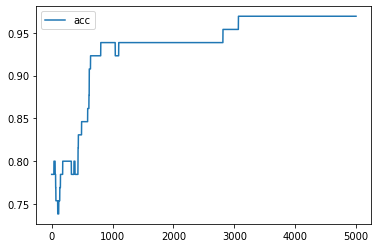

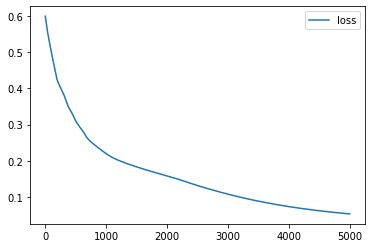

In [8]:
DataFrame({'acc': history.history['acc']}).plot()
DataFrame({'loss': history.history['loss']}).plot()

####[SNE-08]
Plot charts for the final result.

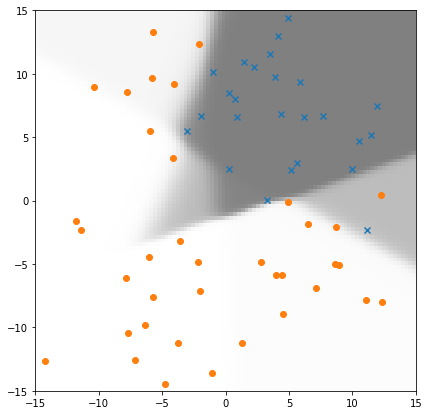

In [9]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(7, 7))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_ylim([-15, 15])
subplot.set_xlim([-15, 15])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = [[x1, x2] for x2 in np.linspace(-15, 15, 100) 
                      for x1 in np.linspace(-15, 15, 100)]
p_vals = model.predict(np.array(locations)).reshape((100, 100))
subplot.imshow(p_vals, origin='lower', extent=(-15, 15, -15, 15),
               vmin=0, vmax=1, cmap=plt.cm.gray_r, alpha=0.5)